# Demo Practical 1

### Load Modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

### Open netcdf File:

In [2]:
path = "era5_monthly.nc"
data = xr.open_dataset(path)
data

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, time: 519)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-19 07:47:40 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

### Dimensions, Coordinates, Variables:

In [3]:
data.dims

Frozen({'longitude': 144, 'latitude': 73, 'time': 519})

In [4]:
data.coords

Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01

In [5]:
data.data_vars

Data variables:
    t2m      (time, latitude, longitude) float32 ...
    msl      (time, latitude, longitude) float32 ...
    tcc      (time, latitude, longitude) float32 ...
    tp       (time, latitude, longitude) float32 ...

In [6]:
# DataArrays contain actual values (similar to numpy arrays)
# Dataset contain a collection of variables that share similar coordinates (no equivalent in numpy!)
data.tp

<xarray.DataArray 'tp' (time: 519, latitude: 73, longitude: 144)>
[5455728 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Attributes:
    units:      m
    long_name:  Total precipitation

In [7]:
# convert to numpy arrays with .values
print(data.tcc.values)

[[[0.9603864  0.9603864  0.9603864  ... 0.9603864  0.9603864  0.9603864 ]
  [0.990707   0.99029493 0.9896846  ... 0.9851067  0.989944   0.9902339 ]
  [0.9937741  0.99559    0.9960478  ... 0.9881281  0.9889064  0.99050856]
  ...
  [0.52633023 0.4971236  0.48082647 ... 0.55062336 0.5518594  0.53800374]
  [0.33039844 0.3493049  0.36873025 ... 0.35591227 0.35672104 0.34341478]
  [0.30979812 0.30979812 0.30979812 ... 0.30979812 0.30979812 0.30979812]]

 [[0.9569835  0.9569835  0.9569835  ... 0.9569835  0.9569835  0.9569835 ]
  [0.9879602  0.98638856 0.9849694  ... 0.99430823 0.9943235  0.99118   ]
  [0.9866327  0.9899287  0.98174965 ... 0.9936673  0.99339265 0.99067646]
  ...
  [0.6669922  0.6689912  0.6674347  ... 0.6839302  0.6838997  0.6739658 ]
  [0.5418186  0.5519662  0.56083196 ... 0.5124136  0.52199656 0.5314269 ]
  [0.5588177  0.5588177  0.5588177  ... 0.5588177  0.5588177  0.5588177 ]]

 [[0.9467444  0.9467444  0.9467444  ... 0.9467444  0.9467444  0.9467444 ]
  [0.9522836  0.946088

### Select subset of Dataset/ DataArray:

In [8]:
# select by index count
data.isel(
    time=0, latitude=17
)  # similar to numpy selection: a = np.array([0,5,9,10, 444]); a[2] -> 9

<xarray.Dataset>
Dimensions:    (longitude: 144)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    latitude   float32 47.5
    time       datetime64[ns] 1979-01-01
Data variables:
    t2m        (longitude) float32 ...
    msl        (longitude) float32 ...
    tcc        (longitude) float32 0.6426 0.7197 0.7927 ... 0.6959 0.7113 0.6505
    tp         (longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-19 07:47:40 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [9]:
# select by coordinate
# slice allows to select a subrange of values
data.sel(
    time="1979-01-01", latitude=47.5, longitude=slice(0, 10)
)  # data.sel(time="1979-01-01") is equivalent to data.sel(time=np.datetime64("1979-01-01"))

<xarray.Dataset>
Dimensions:    (longitude: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 10.0
    latitude   float32 47.5
    time       datetime64[ns] 1979-01-01
Data variables:
    t2m        (longitude) float32 ...
    msl        (longitude) float32 ...
    tcc        (longitude) float32 0.6426 0.7197 0.7927 0.7719 0.7484
    tp         (longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-19 07:47:40 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

### Basic DataArray Operations:


In [10]:
t_onedatapoint = data.t2m.isel(time=0, longitude=0, latitude=0)
print("temperature in Kelvin: ", t_onedatapoint.values)

t_onedatapoint_celcius = t_onedatapoint - 273.15
print("temperature in deg Celcius: ", t_onedatapoint_celcius.values)

t_celsius = data.t2m - 273.15
t_celsius

temperature in Kelvin:  244.70686
temperature in deg Celcius:  -28.443136596679665


<xarray.DataArray 't2m' (time: 519, latitude: 73, longitude: 144)>
array([[[-28.44313 , -28.44313 , -28.44313 , ..., -28.44313 ,
         -28.44313 , -28.44313 ],
        [-26.692993, -26.889954, -27.088638, ..., -26.364746,
         -26.4805  , -26.58934 ],
        [-24.816757, -25.04654 , -25.400711, ..., -24.516144,
         -24.586975, -24.645721],
        ...,
        [-27.612122, -27.96283 , -28.242706, ..., -26.250717,
         -26.715454, -27.185379],
        [-28.38092 , -28.463852, -28.550232, ..., -28.189163,
         -28.27208 , -28.313553],
        [-30.222626, -30.222626, -30.222626, ..., -30.222626,
         -30.222626, -30.222626]],

       [[-31.703232, -31.703232, -31.703232, ..., -31.703232,
         -31.703232, -31.703232],
        [-31.219482, -31.438904, -31.656586, ..., -30.7081  ,
         -30.913681, -31.070908],
        [-30.364288, -30.625168, -30.962067, ..., -29.68013 ,
         -29.887451, -30.070587],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01

### Plot data of DataArray:

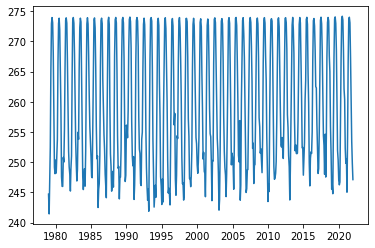

In [11]:
# either via numpy and matplotlib
x = data.t2m.time
y = data.t2m.isel(longitude=0, latitude=0)
plt.plot(x, y)
plt.show()

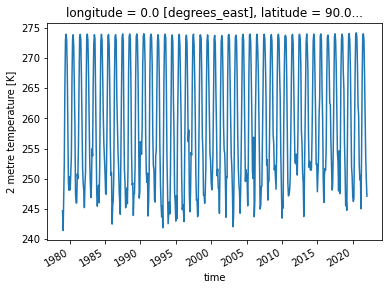

In [12]:
# or use xarray directly
data.t2m.isel(longitude=0, latitude=0).plot.line()  # or simply: .plot()
plt.show()

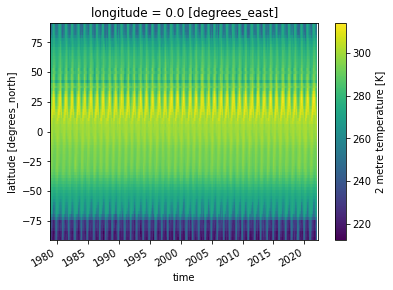

In [13]:
# or 2-dimensional:
data.t2m.isel(longitude=0).plot(x="time")
plt.show()

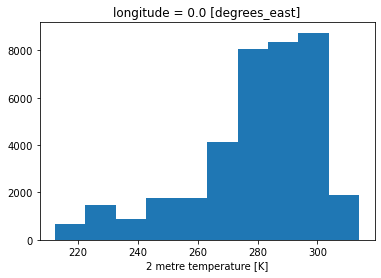

In [14]:
# or a histogram:
data.t2m.isel(longitude=0).plot.hist()
plt.show()

TASK 1

In [15]:
#2,5 Grad Resolution
max_msl = np.nanmax(data.msl.values)
print(max_msl)
min_msl = np.nanmin(data.msl.values)
print(min_msl)

104849.75
95903.0


TASK 2

294.26861572265625 2006-07-01T00:00:00.000000000


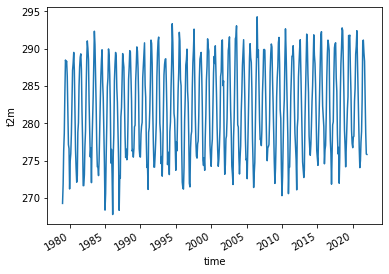

In [16]:
#Deutschland

temp_ger = data.t2m.sel(longitude = slice(5,15), latitude = slice(55,47.5))
temp_ger_mean = temp_ger.mean(dim=['longitude','latitude'])
temp_ger_mean.plot()
print(temp_ger_mean.max().values, temp_ger_mean.idxmax().values)

299.92236328125 2016-03-01T00:00:00.000000000


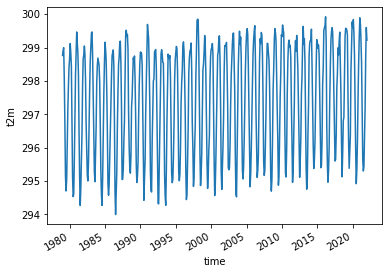

In [17]:
#Madagaskar

temp_mad = data.t2m.sel(longitude = slice(42.5, 50), latitude = slice(-12.5,-25))
temp_mad_mean = temp_mad.mean(dim=['longitude','latitude'])
temp_mad_mean.plot()
print(temp_mad_mean.max().values, temp_mad_mean.idxmax().values)

(array([  23.,   78.,  215.,  736., 1438., 2187., 2464., 2004., 1013.,
         182.]),
 array([0.23888728, 0.31033832, 0.38178933, 0.45324033, 0.52469134,
        0.5961424 , 0.6675934 , 0.7390444 , 0.8104955 , 0.8819465 ,
        0.9533975 ], dtype=float32),
 <BarContainer object of 10 artists>)

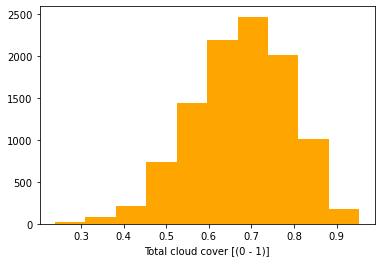

In [18]:
#Cloud Cover

cc_ger = data.tcc.sel(longitude = slice(5,15), latitude = slice(55,47.5))
cc_mad = data.tcc.sel(longitude = slice(42.5, 50), latitude = slice(-12.5,-25))

cc_ger.plot(color="orange")

(array([ 472., 1652., 1852., 1960., 1788., 1319., 1374., 1058.,  740.,
         193.]),
 array([0.02526972, 0.12043703, 0.21560435, 0.31077167, 0.40593898,
        0.5011063 , 0.5962736 , 0.69144094, 0.7866083 , 0.88177556,
        0.9769429 ], dtype=float32),
 <BarContainer object of 10 artists>)

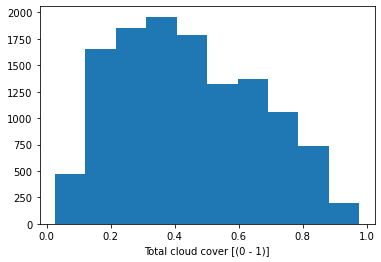

In [19]:
cc_mad.plot()

(array([  23.,   78.,  215.,  736., 1438., 2187., 2464., 2004., 1013.,
         182.]),
 array([0.23888728, 0.31033832, 0.38178933, 0.45324033, 0.52469134,
        0.5961424 , 0.6675934 , 0.7390444 , 0.8104955 , 0.8819465 ,
        0.9533975 ], dtype=float32),
 <BarContainer object of 10 artists>)

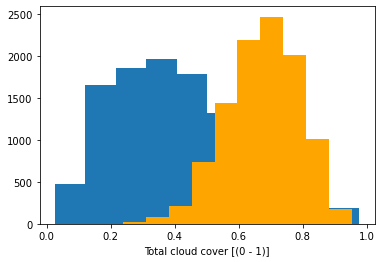

In [20]:
cc_mad.plot()
cc_ger.plot(color="orange")


In [21]:
print('std germany:\n')
print(cc_ger.std().values)
print('\nmean germany:\n')
print(cc_ger.mean().values)
print('\nstd madagaskar:\n')
print(cc_mad.std().values)
print('\nmean madagaskar:\n')
print(cc_mad.mean().values)

std germany:

0.11325644701719284

mean germany:

0.67492425

std madagaskar:

0.21555469930171967

mean madagaskar:

0.4434434
